# We are Gonna Analyse and Prepare a model For predicting Whether customer will Churn or Not 

# Import necessary libraries



In [38]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,roc_curve,roc_auc_score,recall_score,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)



# Loading Dataset

In [39]:
df=pd.read_csv('churn_prediction.csv')
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [40]:
df.shape


(28382, 21)

In [41]:
len(df.customer_id.unique())

28382

- all Customers are Unique and There is No duplicates

In [42]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

- Lots of Null values can be seen in data 

# Data Imputing

In [43]:
df_c=df.copy()

- i like to keep my original different and do prprocessing with copies

In [44]:
df_c.gender.value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

- as we can see male and female population is closely same ,better just fill null values with new variable instead 

In [45]:
dict_gen={'Male': 0,
          'Female': 1}
df_c['gender']=df_c['gender'].map(dict_gen)



In [46]:
df_c['gender']=df_c.gender.fillna(-1)

In [47]:
df_c.gender.value_counts()

 0.0    16548
 1.0    11309
-1.0      525
Name: gender, dtype: int64

In [48]:
df_c.dependents.value_counts()

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
9.0         1
52.0        1
36.0        1
50.0        1
8.0         1
25.0        1
32.0        1
Name: dependents, dtype: int64

- as we can most percentage of dependents is at zero so filling na with mode

In [49]:
dep_mode=df.dependents.mode()[0]
df_c['dependents']=df_c['dependents'].fillna(dep_mode)

In [50]:
df_c.dependents.isna().sum()

0

In [51]:
df_c.occupation.value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

- similarly most occupation is self employed so better just fill na with those

In [52]:
df_c.occupation=df_c.occupation.fillna(df_c.occupation.mode()[0])

In [53]:
df_c.occupation.isna().sum()

0

In [54]:
df_c.city.mode()

0    1020.0
Name: city, dtype: float64

- As we can see whats most repeated city ,better just fill na with those

In [55]:
df_c['city']=df_c['city'].fillna(df_c['city'].mode()[0])

In [56]:
df_c.city.isna().sum()

0

In [57]:
df_c.days_since_last_transaction.value_counts()

0.0      1672
3.0       831
14.0      654
4.0       632
6.0       596
         ... 
309.0       1
225.0       1
183.0       1
92.0        1
334.0       1
Name: days_since_last_transaction, Length: 360, dtype: int64

- there is signifiantly large difference in value counts and lots of na value better just assign some huge values like 999

In [58]:
df_c.days_since_last_transaction=df_c.days_since_last_transaction.fillna(999)

In [59]:
df_c.days_since_last_transaction.isna().sum()

0

In [60]:
df_c.isna().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

- All Na value as been sorted out

# Data preprocessing

- since there are more variables with discrete values in data we are gonna go with Logistic regeresion model
- For that we need to get data in numerical values with no catorigal data 

In [61]:
#changing occupation with get dummies into one not encode
df_c=pd.concat([df_c,pd.get_dummies(df_c['occupation'],prefix=str('occupation'),prefix_sep='_')],axis=1)

In [62]:
df_c.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,0.0,0.0,self_employed,187.0,2,755,224.0,...,0.20,0.20,1458.71,1458.71,0,0,0,0,1,0
1,2,310,35,0.0,0.0,self_employed,1020.0,2,3214,60.0,...,5486.27,100.56,6496.78,8787.61,0,0,0,0,1,0
2,4,2356,31,0.0,0.0,salaried,146.0,2,41,999.0,...,6046.73,259.23,5006.28,5070.14,0,0,0,1,0,0
3,5,478,90,-1.0,0.0,self_employed,1020.0,2,582,147.0,...,0.47,2143.33,2291.91,1669.79,1,0,0,0,1,0
4,6,2531,42,0.0,2.0,self_employed,1494.0,3,388,58.0,...,588.62,1538.06,1157.15,1677.16,1,0,0,0,1,0


<AxesSubplot:>

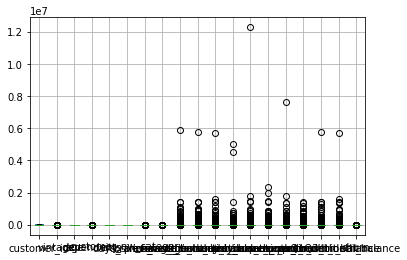

In [63]:
df.boxplot()

- as we can see multiple outliers are present in data ,so we gonna use log transformation to scale them down

In [64]:
df_c.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'occupation_company', 'occupation_retired', 'occupation_salaried',
       'occupation_self_employed', 'occupation_student'],
      dtype='object')

In [65]:
colm=['customer_nw_category', 'current_balance',
      'previous_month_end_balance', 'average_monthly_balance_prevQ2', 'average_monthly_balance_prevQ',
      'current_month_credit','previous_month_credit', 'current_month_debit', 
      'previous_month_debit','current_month_balance', 'previous_month_balance']
for i in colm:
    df_c[i] = np.log(df_c[i] + 17000)
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaled=ss.fit_transform(df_c[colm])
df_scaled=pd.DataFrame(scaled,columns=colm)



In [66]:
df_c1=df_c.copy()
df_c1=df_c1.drop(columns=colm,axis=1)
df_c1=df_c1.merge(df_scaled,left_index=True,right_index=True,how='left')

In [67]:
df_c1.head()

,customer_id,vintage,age,gender,dependents,occupation,city,branch_code,days_since_last_transaction,churn,...,current_balance,previous_month_end_balance,average_monthly_balance_prevQ2,average_monthly_balance_prevQ,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
0,1,3135,66,0.0,0.0,self_employed,187.0,755,224.0,0,...,-0.613738,-0.632367,-0.630646,-0.697612,-0.313931,-0.324487,-0.368251,-0.377390,-0.653455,-0.666207
1,2,310,35,0.0,0.0,self_employed,1020.0,3214,60.0,0,...,0.011267,0.446458,0.949414,0.317595,-0.313852,-0.324410,0.640986,-0.355677,0.149440,0.455680
2,4,2356,31,0.0,0.0,salaried,146.0,41,999.0,0,...,-0.209651,0.057975,-0.388637,-0.108263,-0.313841,-0.324400,0.729825,-0.321607,-0.068597,-0.066642
3,5,478,90,-1.0,0.0,self_employed,1020.0,582,147.0,1,...,-0.470836,-0.488530,-0.712855,-0.582976,-0.313872,-0.324429,-0.368193,0.060593,-0.506570,-0.628056
4,6,2531,42,0.0,2.0,self_employed,1494.0,388,58.0,1,...,-0.708214,-0.642441,-0.554058,-0.663399,-0.313902,-0.175104,-0.245463,-0.057927,-0.708257,-0.626732


In [68]:
df_c1.churn.value_counts()/len(df)*100

0    81.467127
1    18.532873
Name: churn, dtype: float64

- Target Data is not balanced logistic Model wont be able to perform well on its own

In [69]:
#Separating dependent and independant data
Y=df_c1.churn
X=df_c1.drop(['customer_id','occupation','churn'],axis=1)

- Spliting Data in Train and test

In [70]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2,random_state=100)


# Model building

- As this is  classification Problem And data has mostly Discrtete values we first gonna try with Logistic Regressor classifier

In [71]:
LR=LogisticRegression()
model=LR.fit(train_x,train_y)
LR.score(test_x,test_y)

0.8287828078210322

In [72]:
train_pred=LR.predict(train_x)
test_pred=LR.predict(test_x)

In [73]:
cm=confusion_matrix
cm(test_y,test_pred)

array([[4487,  140],
       [ 832,  218]], dtype=int64)

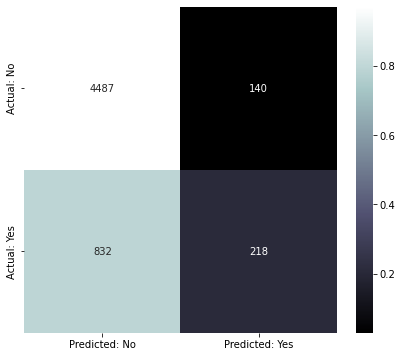

In [74]:
label_preds=test_pred
cm = confusion_matrix(test_y,label_preds)


def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=['Predicted: No','Predicted: Yes'], yticklabels=['Actual: No','Actual: Yes'], cmap=cmap)

plot_confusion_matrix(cm, ['No', 'Yes'])

- As Expected data is heavly unbalanced hence we getting all predicted as not Churned

- Gotta find optimium Threshold value since Default is at 0.5

# Thresholding 

In [75]:
n=[0.1,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
train_recall_score=[]
test_recall_score=[]
train_accuracy_score=[]
test_accuracy_score=[]

for j in range(0,len(n)):
    train_pred=LR.predict_proba(train_x)[:,1]
    for i in range (0,len(train_pred)):
        if train_pred[i]<n[j]:
            train_pred[i]=0
        else:
            train_pred[i]=1
    test_pred=LR.predict_proba(test_x)[:,1]
    for i in range (0,len(test_pred)):
        if test_pred[i]<n[j]:
            test_pred[i]=0
        else:
            test_pred[i]=1
    train_recall_score.append(recall_score(train_y,train_pred))
    test_recall_score.append(recall_score(test_y,test_pred))
    train_accuracy_score.append(accuracy_score(train_y,train_pred))
    test_accuracy_score.append(accuracy_score(test_y,test_pred))
    
        

Text(0, 0.5, 'Accuracy & Recall')

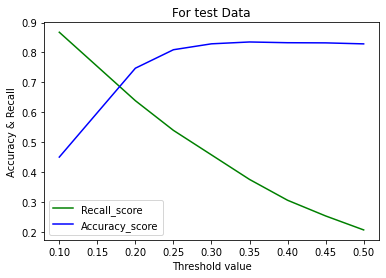

In [76]:

plt.plot(n,test_recall_score,color='g')
plt.plot(n,test_accuracy_score,color='b')
plt.title('For test Data')
plt.legend(('Recall_score','Accuracy_score'))
plt.xlabel('Threshold value')
plt.ylabel('Accuracy & Recall')


Text(0, 0.5, 'Accuracy & Recall')

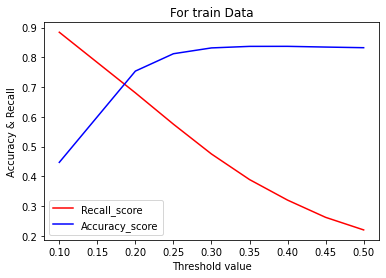

In [77]:
plt.plot(n,train_recall_score,color='r')
plt.plot(n,train_accuracy_score,color='b')
plt.title('For train Data')
plt.legend(('Recall_score','Accuracy_score'))
plt.xlabel('Threshold value')
plt.ylabel('Accuracy & Recall')


- As seen through graphs recall and accuracy seems to balance at 0.2 Threshold for btoh train and testing Data 

- Lets try with Validation set to see whether we can see difference

# Lets predict with Validation Set

In [78]:
from sklearn.model_selection import KFold

In [85]:
kf=KFold(n_splits=5,random_state=42,shuffle=True)
kf

    

KFold(n_splits=5, random_state=42, shuffle=True)

In [101]:
def Cv_Scores(mlmodel,threshold,cols):
    n=0
    for train_index,test_index in kf.split(X[cols],Y):
        n+=1
        print('\n{} of kfold {}'.format(n,kf.n_splits))
        xtr,xts=X[cols].loc[train_index],X[cols].loc[test_index]
        ytr,yts=Y.loc[train_index],Y.loc[test_index]
        model=mlmodel
        model.fit(xtr,ytr)
        xtr_p=model.predict_proba(xtr)[:,1]
        xts_p=model.predict_proba(xts)[:,1]
        for i in range(0,len(xtr)):
            if xtr_p[i]<(threshold):
                xtr_p[i]=0
            else:
                xtr_p[i]=1
        for i in range(0,len(xts_p)):
            if xts_p[i]<(threshold):
                xts_p[i]=0
            else:
                xts_p[i]=1
        print("train accuracy: "+str(accuracy_score(ytr,xtr_p))+" train precision: "+str(precision_score(ytr,xtr_p))+" train recall: "+str(recall_score(ytr,xtr_p)))
        
       
        print("test accuracy:  "+str(accuracy_score(yts,xts_p))+" test precision: "+str(precision_score(yts,xts_p))+" test recall: "+str(recall_score(yts,xts_p)))
       
        

              
        
        
    

In [87]:
Cv_Scores(LogisticRegression(),0.5)


1 of kfold 5
train accuracy: 0.8309182999339353train precision: 0.6568386568386568train recall: 0.18995736617716721
test accuracy: 0.8374141271798485test precision: 0.6936026936026936test recall: 0.19845857418111754

2 of kfold 5
train accuracy: 0.8188064303016956train precision: 0.5700824499411072train recall: 0.11433971178832979
test accuracy: 0.8234983265809407test precision: 0.5576036866359447test recall: 0.11781888997078871

3 of kfold 5
train accuracy: 0.8165683079362283train precision: 0.5644555694618273train recall: 0.1056701030927835
test accuracy: 0.8266384778012685test precision: 0.521505376344086test recall: 0.09778225806451613

4 of kfold 5
train accuracy: 0.8370034352153616train precision: 0.6477438136826783train recall: 0.21670318967616264
test accuracy: 0.8185341789992953test precision: 0.6722689075630253test recall: 0.20815264527320035

5 of kfold 5
train accuracy: 0.8229983264335418train precision: 0.5797827903091061train recall: 0.16484560570071258
test accuracy: 0.

In [88]:
Cv_Scores(LogisticRegression(),0.4)


1 of kfold 5
train accuracy: 0.8371283858181018train precision: 0.6358921161825726train recall: 0.29038370440549505
test accuracy: 0.8430509071692796test precision: 0.6636971046770601test recall: 0.28709055876685935

2 of kfold 5
train accuracy: 0.822373926447919train precision: 0.5651041666666666train recall: 0.20505551618237655
test accuracy: 0.8259644178263167test precision: 0.5514511873350924test recall: 0.2035053554040896

3 of kfold 5
train accuracy: 0.8214568836430899train precision: 0.5726902173913043train recall: 0.19751640112464855
test accuracy: 0.8224101479915433test precision: 0.47752808988764045test recall: 0.17137096774193547

4 of kfold 5
train accuracy: 0.8414956399189641train precision: 0.6221153846153846train recall: 0.3150718285853421
test accuracy: 0.8269908386187456test precision: 0.654054054054054test recall: 0.3148308759757155

5 of kfold 5
train accuracy: 0.8254205936756804train precision: 0.5654255319148936train recall: 0.2524940617577197
test accuracy: 0.829

In [89]:
Cv_Scores(LogisticRegression(),0.3)


1 of kfold 5
train accuracy: 0.8322836379652059train precision: 0.5595169637722829train recall: 0.4609189957366177
test accuracy: 0.837061828430509test precision: 0.5700123915737298test recall: 0.44315992292870904

2 of kfold 5
train accuracy: 0.8076635102400352train precision: 0.4806581986143187train recall: 0.3933380581148122
test accuracy: 0.8111678703540602test precision: 0.47398843930635837test recall: 0.39922103213242455

3 of kfold 5
train accuracy: 0.8069673214128424train precision: 0.48289199642963404train recall: 0.3802717900656045
test accuracy: 0.8090204369274137test precision: 0.446135831381733test recall: 0.3840725806451613

4 of kfold 5
train accuracy: 0.8371355588831146train precision: 0.5594649607444024train recall: 0.46846846846846846
test accuracy: 0.8215292459478506test precision: 0.5788288288288288test recall: 0.4457935819601041

5 of kfold 5
train accuracy: 0.8189905751783669train precision: 0.5144009216589862train recall: 0.42422802850356295
test accuracy: 0.816

In [90]:
Cv_Scores(LogisticRegression(),0.2)


1 of kfold 5
train accuracy: 0.7308522351904867train precision: 0.37622854147556023train recall: 0.6800094741828517
test accuracy: 0.7354236392460807test precision: 0.3730853391684901test recall: 0.6570327552986512

2 of kfold 5
train accuracy: 0.6754018938559788train precision: 0.32178161572548575train recall: 0.669029057406095
test accuracy: 0.6721860137396513test precision: 0.31466666666666665test recall: 0.6893865628042843

3 of kfold 5
train accuracy: 0.6731700872016207train precision: 0.32224602548201603train recall: 0.6696344892221181
test accuracy: 0.6652572233967583test precision: 0.29604672057502246test recall: 0.6643145161290323

4 of kfold 5
train accuracy: 0.7601955430282744train precision: 0.40141467727674623train recall: 0.6632578524470416
test accuracy: 0.7596899224806202test precision: 0.44036178631995476test recall: 0.6756287944492628

5 of kfold 5
train accuracy: 0.7073460759270678train precision: 0.34885164494103044train recall: 0.667458432304038
test accuracy: 0.7

- WE can Conclude that because of target Data being Heavly unbalaced Model is heavly biased ,Therefore for optimum Threshold should be choosen as demanded since recall and precision are traded with each other when changing threshold


# We can try using Backward Feature selection
- we use most features that affects the accuracy score
- We gonna use RFE ,Reverse feature elimination library to find out rank wise features affecting model

In [92]:
from sklearn.feature_selection import RFE
modl=LogisticRegression()
rfe=RFE(estimator=modl,n_features_to_select=1,step=1)
rfe.fit(X,Y)

RFE(estimator=LogisticRegression(), n_features_to_select=1)

In [93]:
rfe.ranking_

array([22, 18, 13, 16, 21, 23, 20,  3, 15,  9,  8, 10, 14,  1, 17,  4,  2,
       12, 19,  7, 11,  5,  6])

In [96]:
ranking_df = pd.DataFrame()
ranking_df['Feature_name'] = X.columns
ranking_df['Rank'] = rfe.ranking_

In [105]:
ranking_df.sort_values(by='Rank',inplace=True)

In [107]:
cols=ranking_df['Feature_name'][:10]
cols

13                   current_balance
16     average_monthly_balance_prevQ
7                 occupation_company
15    average_monthly_balance_prevQ2
21             current_month_balance
22            previous_month_balance
19               current_month_debit
10          occupation_self_employed
9                occupation_salaried
11                occupation_student
Name: Feature_name, dtype: object

In [109]:
Cv_Scores(LogisticRegression(),0.5,cols)


1 of kfold 5
train accuracy: 0.8393305439330544 train precision: 0.7288676236044657 train recall: 0.21648507816200852
test accuracy:  0.8439316540426282 test precision: 0.7483660130718954 test recall: 0.220616570327553

2 of kfold 5
train accuracy: 0.8389781986346619 train precision: 0.725920125293657 train recall: 0.21899362154500354
test accuracy:  0.843403205918619 test precision: 0.73 test recall: 0.21324245374878287

3 of kfold 5
train accuracy: 0.8371355588831146 train precision: 0.728 train recall: 0.21321462043111528
test accuracy:  0.8468992248062015 test precision: 0.71280276816609 test recall: 0.20766129032258066

4 of kfold 5
train accuracy: 0.8436977010481811 train precision: 0.7336683417085427 train recall: 0.21329437545653762
test accuracy:  0.8234672304439746 test precision: 0.711484593837535 test recall: 0.22029488291413704

5 of kfold 5
train accuracy: 0.8393816612349159 train precision: 0.7301717089125103 train recall: 0.21211401425178147
test accuracy:  0.840204369

In [110]:
Cv_Scores(LogisticRegression(),0.4,cols)


1 of kfold 5
train accuracy: 0.8442633781105483 train precision: 0.6842105263157895 train recall: 0.30175272382756985
test accuracy:  0.8516822265280958 test precision: 0.7207207207207207 test recall: 0.30828516377649323

2 of kfold 5
train accuracy: 0.8443514644351464 train precision: 0.6873994638069705 train recall: 0.3028584927947082
test accuracy:  0.8483353884093712 test precision: 0.6903669724770642 test recall: 0.29308666017526774

3 of kfold 5
train accuracy: 0.8433453712675064 train precision: 0.69352204681546 train recall: 0.2985004686035614
test accuracy:  0.8491895701198027 test precision: 0.6517857142857143 test recall: 0.29435483870967744

4 of kfold 5
train accuracy: 0.8489386065357174 train precision: 0.6926579396698919 train recall: 0.2963233503774044
test accuracy:  0.8291050035236082 test precision: 0.6833667334669339 test recall: 0.29575021682567215

5 of kfold 5
train accuracy: 0.8445785254998679 train precision: 0.6890616324264298 train recall: 0.2947743467933492

In [111]:
Cv_Scores(LogisticRegression(),0.3,cols)


1 of kfold 5
train accuracy: 0.8521030609997798 train precision: 0.6419185282522996 train recall: 0.46281383230696355
test accuracy:  0.8564382596441783 test precision: 0.6627737226277373 test recall: 0.4373795761078998

2 of kfold 5
train accuracy: 0.851530499889892 train precision: 0.6418696510862409 train recall: 0.4606661941885188
test accuracy:  0.8543244671481416 test precision: 0.6412429378531074 test recall: 0.44206426484907496

3 of kfold 5
train accuracy: 0.8505240905487537 train precision: 0.6459585838343354 train recall: 0.45313964386129335
test accuracy:  0.857293868921776 test precision: 0.6184895833333334 test recall: 0.4788306451612903

4 of kfold 5
train accuracy: 0.8545758830265128 train precision: 0.6421759095725892 train recall: 0.4426588750913075
test accuracy:  0.8417899929527837 test precision: 0.660377358490566 test recall: 0.45533391153512576

5 of kfold 5
train accuracy: 0.8524619043424645 train precision: 0.6460597826086957 train recall: 0.4517814726840855
t

In [112]:
Cv_Scores(LogisticRegression(),0.2,cols)


1 of kfold 5
train accuracy: 0.8227262717463114 train precision: 0.5176112998390846 train recall: 0.6856939838938891
test accuracy:  0.8279020609476836 test precision: 0.5230188679245283 test recall: 0.6676300578034682

2 of kfold 5
train accuracy: 0.8237833076414887 train precision: 0.5209084354722423 train recall: 0.6827309236947792
test accuracy:  0.8243790734542893 test precision: 0.5110456553755522 test recall: 0.6757546251217137

3 of kfold 5
train accuracy: 0.8202237294107284 train precision: 0.5164194915254238 train recall: 0.6853327085285849
test accuracy:  0.817477096546864 test precision: 0.4845505617977528 test recall: 0.6955645161290323

4 of kfold 5
train accuracy: 0.8296925922663613 train precision: 0.5227876946448917 train recall: 0.6703189676162649
test accuracy:  0.8222339675828048 test precision: 0.5511363636363636 test recall: 0.6730268863833477

5 of kfold 5
train accuracy: 0.8232625737690479 train precision: 0.5178603807796918 train recall: 0.6783847980997625
tes

- We can Good amount of accuracy Increase while recall Increases from just selecting Top affecting columns 
- Has for Threshold it can be selected on bases of Business demand